In [1]:
import generate
import SFS_DA

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

In [2]:
def runLasso_DA():
    # Our proposed method

    ns = 20
    nt = 10

    p = 5

    true_beta_s = np.full((p, 1), 2)
    true_beta_t = np.full((p, 1), 0)
    
    Xs, Xt, Ys, Yt, Sigma_s, Sigma_t = generate.gen_data(ns, nt, p, true_beta_s, true_beta_t)

    Lambda = 10

    return SFS_DA.SFS_DA_Lasso_rand_feature(Xs, Ys, Xt, Yt, Lambda, Sigma_s, Sigma_t, zmin=-20, zmax=20)

In [3]:
def runElasticNet_DA():
    # Our proposed method

    ns = 20
    nt = 10

    p = 5

    true_beta_s = np.full((p, 1), 2)
    true_beta_t = np.full((p, 1), 0)
    
    Xs, Xt, Ys, Yt, Sigma_s, Sigma_t = generate.gen_data(ns, nt, p, true_beta_s, true_beta_t)

    Lambda = 10
    Gamma = 1
    return SFS_DA.SFS_DA_ElasticNet_rand_feature(Xs, Ys, Xt, Yt, Lambda, Gamma, Sigma_s, Sigma_t, zmin=-20, zmax=20)

In [4]:
max_iteration = 120
alpha = 0.05
reject = 0
detect = 0
list_p_value_LDA = []

for i in range(max_iteration):

    p_value = runLasso_DA()

    if p_value is not None:
        list_p_value_LDA.append(p_value)

        detect += 1

        if p_value <= alpha:
            reject += 1

False positive rate: 0.06097560975609756
KS-Test result: 0.8086033742435632


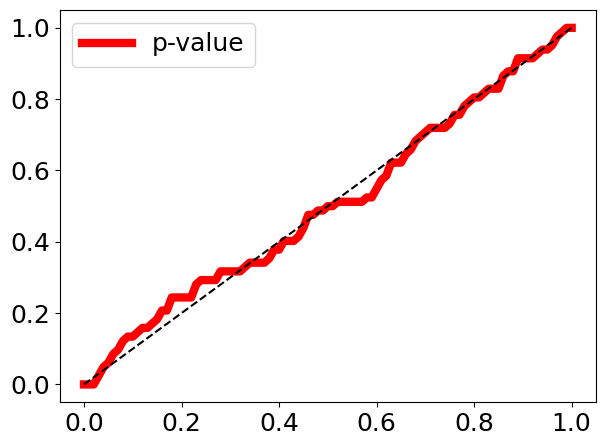

In [5]:
print(f"False positive rate: {reject / detect}")
print(f'KS-Test result: {scipy.stats.kstest(list_p_value_LDA, 'uniform')[1]}')

plt.rcParams.update({'font.size': 18})
grid = np.linspace(0, 1, 101)
plt.plot(grid, sm.distributions.ECDF(np.array(list_p_value_LDA))(grid), 'r-', linewidth=6, label='p-value')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
max_iteration = 120
alpha = 0.05
reject = 0
detect = 0
list_p_value_ENDA = []

for i in range(max_iteration):

    p_value = runElasticNet_DA()

    if p_value is not None:
        list_p_value_ENDA.append(p_value)

        detect += 1

        if p_value <= alpha:
            reject += 1

False positive rate: 0.03488372093023256
KS-Test result: 0.749862474093318


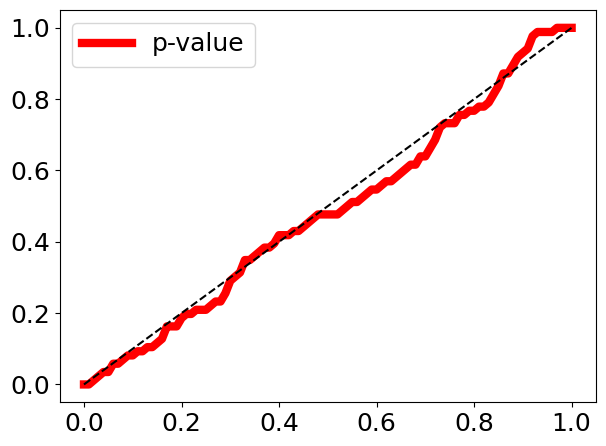

In [9]:
print(f"False positive rate: {reject / detect}")
print(f'KS-Test result: {scipy.stats.kstest(list_p_value_ENDA, 'uniform')[1]}')

plt.rcParams.update({'font.size': 18})
grid = np.linspace(0, 1, 101)
plt.plot(grid, sm.distributions.ECDF(np.array(list_p_value_ENDA))(grid), 'r-', linewidth=6, label='p-value')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()
plt.show()